# Chapter 9: Classification and Regression Trees (revised by Kang)

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


In [2]:


from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
# If you have the error related to "graphviz", please install "graphviz" using this information: 
# https://graphviz.org/download/

## Figure 9.7

Classes: Nonowner, Owner


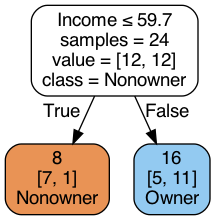

In [5]:
mower_df = dmba.load_data('RidingMowers.csv')

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

In [ ]:
# mower_df = pd.read_csv('./data/RidingMowers.csv')

In [ ]:
# mower_df = dmba.load_data('RidingMowers.csv')

In [ ]:
# mower_df.head()

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully

In [ ]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Figure 9.10

In [ ]:
bank_df = dmba.load_data('UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [ ]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

## Table 9.4

In [ ]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

## Figure 9.12

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

## Table 9.5

In [ ]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

In [ ]:
conda install -c conda-forge python-graphviz

In [ ]:
!pip install dmba -U